In [1]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader, Dataset

import numpy as np

In [37]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

class MnistDataset(torch.utils.data.Dataset):

    def __init__(self, file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        data = pd.read_csv(file)
        print(data.shape)
        self.x = data[data.columns[1:]].values.view(-1, 28,28) / 255
        self.y = data[data.columns[0]].values
        del data
        self.transform = transform

    def __len__(self):
        return self.y.shape[0]

    def __getitem__(self, idx):
        return self.x[idx].reshape(1,28,28).astype(np.float32), self.y[idx]

mnist_dataset = MnistDataset("../../239_all/239/6.Intro_to_NN/data/train.csv")

mnist_dataset

(42000, 785)


In [3]:
dataloader = DataLoader(mnist_dataset, batch_size=4,
                        shuffle=True, num_workers=4)

In [27]:
class readymadeVAE(nn.Module):
    def __init__(self):
        super(readymadeVAE, self).__init__()

        self.fc1 = nn.Linear(784, 400)
        self.fc21 = nn.Linear(400, 10)
        self.fc22 = nn.Linear(400, 10)
        self.fc3 = nn.Linear(10, 400)
        self.fc4 = nn.Linear(400, 784)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return eps.mul(std).add_(mu)

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar




In [28]:
import sys
sys.path.append("./models/encoder")

from models.models import *

In [29]:
model = VAE([322], [322])
optimizer = optim.Adam(model.parameters(), lr=1e-3)

r_model = readymadeVAE()
r_optimizer = optim.Adam(r_model.parameters(), lr=1e-3)

In [30]:
data.shape

torch.Size([4, 1, 28, 28])

In [32]:
model(data.view(-1, 784))

(tensor([[0.4565, 0.5269, 0.4947,  ..., 0.4720, 0.5941, 0.4858],
         [0.4319, 0.5516, 0.4399,  ..., 0.5008, 0.4966, 0.5328],
         [0.5095, 0.4770, 0.3752,  ..., 0.4886, 0.6522, 0.4138],
         [0.4981, 0.5265, 0.4496,  ..., 0.4268, 0.5477, 0.5737]],
        grad_fn=<SigmoidBackward>),
 tensor([[ 0.0523,  0.0963, -0.1258,  0.1204, -0.0472,  0.1281,  0.0230,  0.1104,
          -0.1819, -0.0618],
         [-0.0204,  0.0783, -0.1201,  0.0427, -0.1156,  0.2701,  0.0294,  0.2823,
          -0.1711, -0.1099],
         [ 0.0273,  0.0319, -0.0960,  0.0877, -0.0300,  0.1297,  0.0942,  0.0984,
          -0.0943, -0.1065],
         [-0.0149, -0.0522, -0.1054,  0.0166, -0.0424,  0.1471,  0.0923,  0.1523,
          -0.1665, -0.1135]], grad_fn=<ThAddmmBackward>),
 tensor([[-0.1003, -0.0254,  0.0532,  0.1187,  0.0890, -0.0329,  0.1429, -0.0515,
           0.0292,  0.0931],
         [ 0.0047, -0.0218,  0.2612,  0.1665, -0.1220, -0.0344,  0.1753, -0.0816,
           0.1018,  0.1001],
        

In [24]:
r_model(data)

(tensor([[0.4893, 0.4223, 0.4840,  ..., 0.5303, 0.5503, 0.5290],
         [0.5316, 0.4284, 0.5506,  ..., 0.5401, 0.4504, 0.5455],
         [0.4494, 0.4522, 0.4068,  ..., 0.5271, 0.4361, 0.5828],
         [0.5606, 0.4432, 0.5079,  ..., 0.6242, 0.4571, 0.6160]],
        grad_fn=<SigmoidBackward>),
 tensor([[ 0.1287,  0.0771, -0.0390,  0.0187, -0.0038, -0.0049,  0.0612, -0.0530,
           0.0396,  0.1416],
         [ 0.0854,  0.0871,  0.0792,  0.0239, -0.0575,  0.0082,  0.1015,  0.1042,
           0.1251,  0.0799],
         [-0.0209,  0.0221, -0.0213, -0.0351, -0.0681, -0.0401,  0.0341, -0.0330,
           0.0153,  0.0219],
         [ 0.0224,  0.0140,  0.0526, -0.0210, -0.0275,  0.0064,  0.0350,  0.0170,
          -0.0295,  0.0472]], grad_fn=<ThAddmmBackward>),
 tensor([[ 0.1313,  0.0806, -0.1507, -0.0675,  0.0720,  0.0539,  0.0268, -0.0721,
           0.0158, -0.1204],
         [ 0.0593,  0.1292, -0.0468, -0.0725,  0.2111,  0.0588, -0.0295, -0.0054,
          -0.0487, -0.2285],
        

In [8]:
for p in model.parameters():
    print(p.shape, p.requires_grad)

torch.Size([400, 784]) True
torch.Size([400]) True
torch.Size([10, 400]) True
torch.Size([10]) True
torch.Size([10, 400]) True
torch.Size([10]) True
torch.Size([400, 10]) True
torch.Size([400]) True
torch.Size([784, 400]) True
torch.Size([784]) True


In [ ]:
torch.Size([400, 784]) True
torch.Size([400]) True
torch.Size([10, 400]) True
torch.Size([10]) True
torch.Size([10, 400]) True
torch.Size([10]) True
torch.Size([400, 10]) True
torch.Size([400]) True
torch.Size([784, 400]) True
torch.Size([784]) True


In [34]:
# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD

In [35]:
#def train(epoch):
epoch = 1
model.train()
train_loss = 0
for batch_idx, (data, _) in enumerate(dataloader):
    data = data.view(-1, 784) #.to(device)
    optimizer.zero_grad()
    recon_batch, mu, logvar = model(data)
    loss = loss_function(recon_batch, data, mu, logvar)
    loss.backward()
    train_loss += loss.item()
    optimizer.step()
    if batch_idx % 100 == 0:
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(mnist_dataset),
            100. * batch_idx / len(dataloader),
            loss.item() / len(data)))

print('====> Epoch: {} Average loss: {:.4f}'.format(
      epoch, train_loss / len(train_loader.dataset)))

Train Epoch: 1 [0/42000 (0%)]	Loss: 550.065125
Train Epoch: 1 [400/42000 (1%)]	Loss: 184.998627
Train Epoch: 1 [800/42000 (2%)]	Loss: 175.157623
Train Epoch: 1 [1200/42000 (3%)]	Loss: 151.511917
Train Epoch: 1 [1600/42000 (4%)]	Loss: 130.894669
Train Epoch: 1 [2000/42000 (5%)]	Loss: 210.291748
Train Epoch: 1 [2400/42000 (6%)]	Loss: 146.772766
Train Epoch: 1 [2800/42000 (7%)]	Loss: 144.213715
Train Epoch: 1 [3200/42000 (8%)]	Loss: 126.045113
Train Epoch: 1 [3600/42000 (9%)]	Loss: 135.661346
Train Epoch: 1 [4000/42000 (10%)]	Loss: 154.822189
Train Epoch: 1 [4400/42000 (10%)]	Loss: 141.933975
Train Epoch: 1 [4800/42000 (11%)]	Loss: 162.077301
Train Epoch: 1 [5200/42000 (12%)]	Loss: 98.855286
Train Epoch: 1 [5600/42000 (13%)]	Loss: 147.887039
Train Epoch: 1 [6000/42000 (14%)]	Loss: 141.169830
Train Epoch: 1 [6400/42000 (15%)]	Loss: 151.641953
Train Epoch: 1 [6800/42000 (16%)]	Loss: 113.113228
Train Epoch: 1 [7200/42000 (17%)]	Loss: 152.813004
Train Epoch: 1 [7600/42000 (18%)]	Loss: 131.998

NameError: name 'train_loader' is not defined

In [13]:
data.shape

torch.Size([4, 1, 28, 28])

In [ ]:
plt.imshow(data[1][0].detach().numpy())

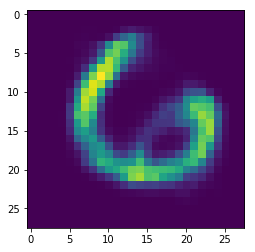

In [46]:
plt.imshow(model(data.reshape(-1, 784))[0].reshape(4,28,28)[2].detach().numpy())

In [62]:
model.encode(data.reshape(-1, 784))[0]

tensor([[-0.3544, -0.2594, -1.8047,  2.1147, -0.9204, -2.2100, -0.7898, -0.3405,
         -0.8139, -0.3018],
        [ 0.3035, -1.5446, -1.4792,  0.9002,  2.7652, -1.5214, -0.5923,  0.7390,
          1.0623,  0.4475],
        [ 0.9790, -1.4366, -0.5079,  0.4297, -2.2378,  0.2054,  0.0132, -1.9752,
          2.2857,  0.1080],
        [-1.4709,  0.9919,  0.9429,  0.4425,  0.8393, -0.1693, -0.2657,  0.4160,
          1.2027, -0.8108]], grad_fn=<ThAddmmBackward>)

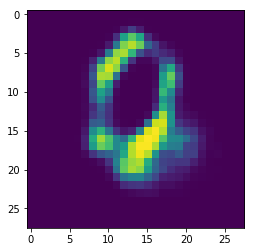

In [72]:
plt.imshow(model.decode(torch.randn(10)).reshape(28,28).detach())

In [ ]:
def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch, mu, logvar = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar).item()
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(args.batch_size, 1, 28, 28)[:n]])
                save_image(comparison.cpu(),
                         'results/reconstruction_' + str(epoch) + '.png', nrow=n)

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

if __name__ == "__main__":
    for epoch in range(1, args.epochs + 1):
        train(epoch)
        test(epoch)
        with torch.no_grad():
            sample = torch.randn(64, 20).to(device)
            sample = model.decode(sample).cpu()
            save_image(sample.view(64, 1, 28, 28),
'results/sample_' + str(epoch) + '.png')